In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

1. Buatlah model machine learning yang berisi proses pre-processing machine
learning, training, dan hasil dari perbadingan 2 algoritma machine learning yaitu Random Forest dan
Xgboost. Ambil algoritma terbaik dan simpan dengan menggunakan pickle. Seluruh proses disimpan
dengan extension .ipynb


In [2]:
data = pd.read_csv("Datasets/UTS_Ml/Dataset_B_hotel.csv")
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
for col in data.columns:
    null_count = data[col].isnull().sum()
    null_percentage = (null_count / len(data)) * 100
    print(f"{col.ljust(40)}\t{null_count}\t\t\t{null_percentage:.2f}%")

Booking_ID                              	0			0.00%
no_of_adults                            	0			0.00%
no_of_children                          	0			0.00%
no_of_weekend_nights                    	0			0.00%
no_of_week_nights                       	0			0.00%
type_of_meal_plan                       	907			2.50%
required_car_parking_space              	1270			3.50%
room_type_reserved                      	0			0.00%
lead_time                               	0			0.00%
arrival_year                            	0			0.00%
arrival_month                           	0			0.00%
arrival_date                            	0			0.00%
market_segment_type                     	0			0.00%
repeated_guest                          	0			0.00%
no_of_previous_cancellations            	0			0.00%
no_of_previous_bookings_not_canceled    	0			0.00%
avg_price_per_room                      	1632			4.50%
no_of_special_requests                  	0			0.00%
booking_status                          	0			0.00%


Note: Since all of the NULL values are <5%, we will impute them all accordingly

In [5]:
data['type_of_meal_plan'] = data['type_of_meal_plan'].fillna(data['type_of_meal_plan'].mode()[0])

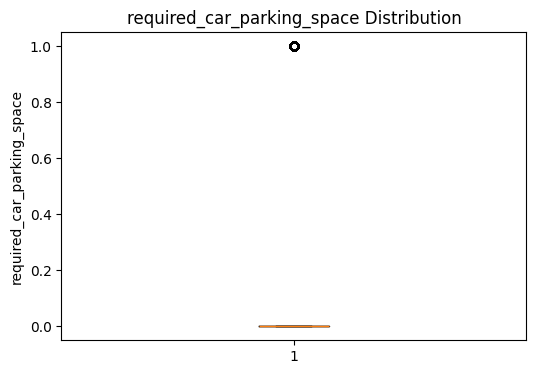

In [6]:
required_car_parking_space_clean = data['required_car_parking_space'].dropna()

plt.figure(figsize=(6, 4))
plt.boxplot(required_car_parking_space_clean)
plt.title('required_car_parking_space Distribution')
plt.ylabel('required_car_parking_space')
plt.show()

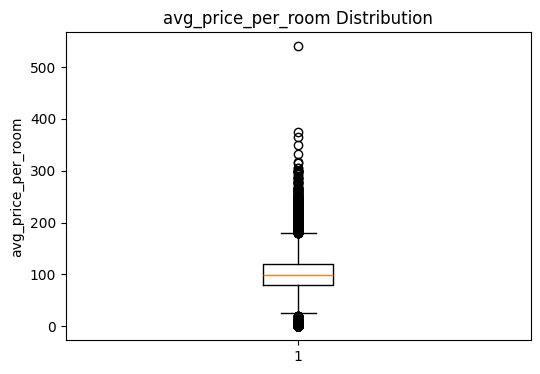

In [7]:
avg_price_per_room_clean = data['avg_price_per_room'].dropna()

plt.figure(figsize=(6, 4))
plt.boxplot(avg_price_per_room_clean)
plt.title('avg_price_per_room Distribution')
plt.ylabel('avg_price_per_room')
plt.show()

Note: Since both avg_price_per_room and required_car_parking_space columns are skewed, we are going to impute it using the median of the column

In [8]:
avg_price_per_room_median = data['avg_price_per_room'].median()
data['avg_price_per_room'] = data['avg_price_per_room'].fillna(avg_price_per_room_median)

required_car_parking_space_median = data['required_car_parking_space'].median()
data['required_car_parking_space'] = data['required_car_parking_space'].fillna(required_car_parking_space_median)

Note: Final Check for the NULL values

In [9]:
for col in data.columns:
    null_count = data[col].isnull().sum()
    null_percentage = (null_count / len(data)) * 100
    print(f"{col.ljust(40)}\t{null_count}\t\t\t{null_percentage:.2f}%")

Booking_ID                              	0			0.00%
no_of_adults                            	0			0.00%
no_of_children                          	0			0.00%
no_of_weekend_nights                    	0			0.00%
no_of_week_nights                       	0			0.00%
type_of_meal_plan                       	0			0.00%
required_car_parking_space              	0			0.00%
room_type_reserved                      	0			0.00%
lead_time                               	0			0.00%
arrival_year                            	0			0.00%
arrival_month                           	0			0.00%
arrival_date                            	0			0.00%
market_segment_type                     	0			0.00%
repeated_guest                          	0			0.00%
no_of_previous_cancellations            	0			0.00%
no_of_previous_bookings_not_canceled    	0			0.00%
avg_price_per_room                      	0			0.00%
no_of_special_requests                  	0			0.00%
booking_status                          	0			0.00%


In [10]:
num_cols = []
cat_cols = []

for i in data.columns:
    if data[i].dtype == 'object':
        cat_cols.append(i)
    elif "int" in str(data[i].dtype) or "float" in str(data[i].dtype):
        num_cols.append(i)
        
print(num_cols)
print(cat_cols)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']
['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


Note: Splitting Data but skipping the BookingID since its just an identifier aswell as Encoding + LabelEncoder

In [11]:
X = data.drop(columns=['Booking_ID', 'booking_status'])
y = data['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
numerical_cols = X_train.drop(columns=categorical_cols).columns 

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = ohe.fit_transform(X_train[categorical_cols])
X_test_cat = ohe.transform(X_test[categorical_cols])

X_train_num = X_train[numerical_cols].to_numpy()
X_test_num = X_test[numerical_cols].to_numpy()
X_train_combined = np.hstack((X_train_num, X_train_cat))
X_test_combined = np.hstack((X_test_num, X_test_cat))

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
print(le.classes_)

['Canceled' 'Not_Canceled']


Note: Label Encoding for Y (target variable) since its categorical and we'll transform canceled and not_canceled into 0 and 1, while we use one hot encoding for the features since we have values like Meal Plan 1 and Meal Plan 2 and we dont want to mislead the model into thinking that there is an ordinal relationship between

Note: Training Random Forest

In [12]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_combined, y_train_encoded)
y_pred_rf = rf.predict(X_test_combined)

Note: Training XgBoost

In [13]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_combined, y_train_encoded)
y_pred_xgb = xgb.predict(X_test_combined)

In [14]:
print("Random Forest Results:")
print("Accuracy:", (accuracy_score(y_test_encoded, y_pred_rf))*100)
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_rf))

print("\n\nXGBoost Results:")
print("Accuracy:", (accuracy_score(y_test_encoded, y_pred_xgb))*100)
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb))

Random Forest Results:
Accuracy: 90.1722949689869
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      2416
           1       0.91      0.94      0.93      4839

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



XGBoost Results:
Accuracy: 88.94555478980014
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83      2416
           1       0.90      0.94      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Training predictions
y_pred_train_xgb = xgb.predict(X_train_combined)

# Testing predictions
y_pred_test_xgb = xgb.predict(X_test_combined)

# Evaluation on training set
print("[XGBoost - Training Set]")
print("Accuracy:", accuracy_score(y_train_encoded, y_pred_train_xgb) * 100)
print("Classification Report:\n", classification_report(y_train_encoded, y_pred_train_xgb))

# Evaluation on testing set
print("\n[XGBoost - Test Set]")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_test_xgb) * 100)
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_test_xgb))


[XGBoost - Training Set]
Accuracy: 91.84011026878015
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      9469
           1       0.93      0.96      0.94     19551

    accuracy                           0.92     29020
   macro avg       0.91      0.90      0.91     29020
weighted avg       0.92      0.92      0.92     29020


[XGBoost - Test Set]
Accuracy: 88.94555478980014
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83      2416
           1       0.90      0.94      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.88      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



Note: Random Forest is the better model in this case since for the accuracy metric, Random Forest gained 91% while XGBoost got 88%, a small margin, but it's still better. Accuracy shows the percentage of total correct predictions. For the Canceled Label/Class, Random Forest still performs better on all metrics, just like Precision, Recall, and F1 Score, indicating that the model is consistent. Overall, the differences aren’t massive, but enough to justify using RF as the better model in this case.

In [16]:
for col in data.columns:
    max_val = data[col].max()
    min_val = data[col].min()
    print(f"Column '{col}': Max = {max_val}, Min = {min_val}")

Column 'Booking_ID': Max = INN36275, Min = INN00001
Column 'no_of_adults': Max = 4, Min = 0
Column 'no_of_children': Max = 10, Min = 0
Column 'no_of_weekend_nights': Max = 7, Min = 0
Column 'no_of_week_nights': Max = 17, Min = 0
Column 'type_of_meal_plan': Max = Not Selected, Min = Meal Plan 1
Column 'required_car_parking_space': Max = 1.0, Min = 0.0
Column 'room_type_reserved': Max = Room_Type 7, Min = Room_Type 1
Column 'lead_time': Max = 443, Min = 0
Column 'arrival_year': Max = 2018, Min = 2017
Column 'arrival_month': Max = 12, Min = 1
Column 'arrival_date': Max = 31, Min = 1
Column 'market_segment_type': Max = Online, Min = Aviation
Column 'repeated_guest': Max = 1, Min = 0
Column 'no_of_previous_cancellations': Max = 13, Min = 0
Column 'no_of_previous_bookings_not_canceled': Max = 58, Min = 0
Column 'avg_price_per_room': Max = 540.0, Min = 0.0
Column 'no_of_special_requests': Max = 5, Min = 0
Column 'booking_status': Max = Not_Canceled, Min = Canceled


Note: The code above is later used in for the Streamlit Deployment

In [18]:
import joblib
joblib.dump((rf, ohe, le), 'hotel_booking_model_project/best_model.pkl', compress=3)

['hotel_booking_model_project/best_model.pkl']